In [ ]:
import Config
import numpy as np
import pandas as pd
#import cv2
import matplotlib.pyplot as plt
#import skimage as sk
from PIL import Image  
import numpy as np
import os
import seaborn as sns
import ptitprince as pt
import matplotlib.collections as clt

In [ ]:
pic_segm = np.array(os.listdir('../data/example_segmentation'))

pics_segment= [y.replace('_segmentation.png', '') for y in pic_segm]


In [ ]:
def get_assymetry(mask):
    ''' get the assymetry for a given mask by folding it in half from multiple angles'''
    return round(np.mean([assymetry(mask), assymetry(mask.rotate(30, expand= True)),assymetry(mask.rotate(60, expand= True)),assymetry(mask.rotate(90, expand= True))]),2)
    

In [ ]:
def assymetry(mask):
    ''' get the assymetry between the left and right part of a given binary mask '''
    width, height = mask.size #mask should be quadratic and therefore have equal dimension
    size = width * height

    #check for uneven number of pixels (should not happen but just as a precaution)
    if width %2 != 0:
        raise TypeError("Uneven number of pixel and cannot be symmetric")
    
    #cut in half and fold
    left = mask.crop((0, 0, (width/2), height)) #left part of picture (left, top, right, bottom)
    right = mask.crop(((width/2), 0, width, height)) #right part of picture
    right = right.transpose(Image.FLIP_LEFT_RIGHT) #flip right part to compare

    #get the binary difference between left an right
    symmetry = np.where(np.array(left) != np.array(right), 1, 0)

    return np.sum(symmetry) / (size/2) #the percentage of assymetry 
    

In [ ]:
def cut_image(picture):
    width, height = picture.size
    image = np.array(picture)
    
    if width %2 != 0:
        image = np.delete(image, -1, 1)

    if height %2 != 0:
        image = np.delete(image, -1, 0)

    image = Image.fromarray(image)

    return image

In [ ]:
assymetry_values = []
for i in range(len(pic_segm)):
    path = "../data/example_segmentation/" + pic_segm[i]
    image_file = Image.open(path) # open colour imag
    image_file = cut_image(image_file)
    pic_name= pic_segm[i].replace('_segmentation.png', '')
    assymetry_values.append([pic_name,get_assymetry(image_file)])

In [ ]:
df = pd.read_csv(Config.example_ground_truth_path)
features_df = pd.read_csv(Config.features_path)
asy = pd.DataFrame(assymetry_values, columns=["name", "assymetry"])
merged =df.merge(asy,left_on= "image_id", right_on = "name")

merged.drop(["name", "seborrheic_keratosis"], axis=1)



,image_id,melanoma,assymetry
0,ISIC_0001769,0.0,0.03
1,ISIC_0001852,0.0,0.01
2,ISIC_0001871,0.0,0.03
3,ISIC_0003462,0.0,0.03
4,ISIC_0003539,0.0,0.06
...,...,...,...
145,ISIC_0015443,0.0,0.06
146,ISIC_0015445,0.0,0.38
147,ISIC_0015483,0.0,0.09
148,ISIC_0015496,0.0,0.12


<AxesSubplot:>

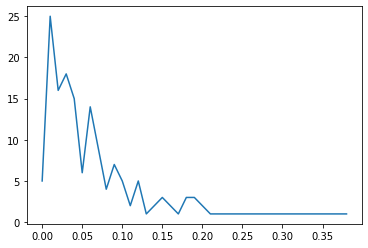

In [ ]:
for_plot = np.unique(merged["assymetry"], return_counts=True)
sns.lineplot(x=for_plot[0], y=for_plot[1])

<AxesSubplot:ylabel='assymetry'>

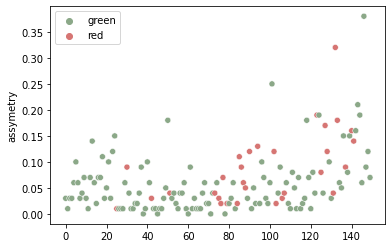

In [ ]:
colors1 = ['#8BA888','#D67573']
colors = ["green" if merged['melanoma'][x] == 0.0 else 'red' for x in range(len(merged['melanoma'])) ]

sns.scatterplot(x = [i for i in range(len(merged["assymetry"]))],y = merged["assymetry"], hue= colors, palette=colors1)

In [ ]:
# picture_path = "../data/example_segmentation/ISIC_0001852_segmentation.png"
# picture_2 = "../data/example_segmentation/ISIC_0010459_segmentation.png"
# picture = plt.imread(picture_path)
# horizontalProj = np.sum(picture, axis= 1)
# verticalProj = np.sum(picture, axis=0)

# comparison = 0

# for i in range(len(horizontalProj)):
#     comparison += (int(horizontalProj[i])- int(verticalProj[i]))^2
# comparison


Text(0.5, 1.0, 'Raincloud plot of the melanoma assymetry')

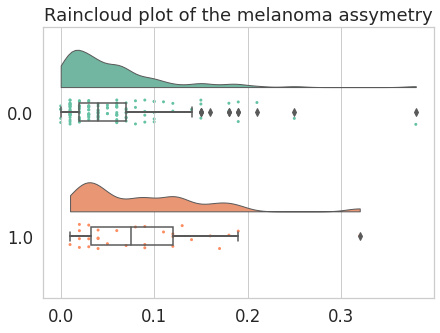

In [ ]:
sns.set(style="whitegrid",font_scale=1.5)

dx = list(merged["melanoma"]); dy = list(merged["assymetry"])
f, ax = plt.subplots(figsize = (7,5))
sigma = .2; ort = "h"

#does not work but should be without boxplots
#ax = pt.half_violinplot(x = dx, y= dy, bw = .2, scale = "area", cut = 0., width= .6, inner= None, orient= ort)
#ax = sns.stripplot( x=dx, y = dy, edgecolor="white", size=3, jitter=1, zorder=0, orient=ort)

#Version with boxplots
ax = pt.RainCloud(x = dx, y = dy, width_viol = .6, ax = ax, bw = sigma, orient= ort)
plt.title("Raincloud plot of the melanoma assymetry")


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=932aa97b-f6d2-4889-8f04-d6166675cc2f' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>